# Facebook Prophet

**Papaer for Prophet! It is relatively straightforward and has a lot of insight on their techniques on how Prophet works internally!**
Link to paper: https://peerj.com/preprints/3190.pdf


<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/prophet.png" width="1200">

In [1]:
import pandas as pd
from fbprophet import Prophet

## Load Data

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/BeerWineLiquor.csv

--2021-05-18 16:59:02--  https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/BeerWineLiquor.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.149.130
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.149.130|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4627 (4.5K) [text/csv]
Saving to: ‘BeerWineLiquor.csv’

BeerWineLiquor.csv  100%[===================>]   4.52K  --.-KB/s    in 0s      

2021-05-18 16:59:02 (73.4 MB/s) - ‘BeerWineLiquor.csv’ saved [4627/4627]



In [3]:
df = pd.read_csv('BeerWineLiquor.csv')
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    324 non-null    datetime64[ns]
 1   beer    324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [8]:
df

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822
...,...,...
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130


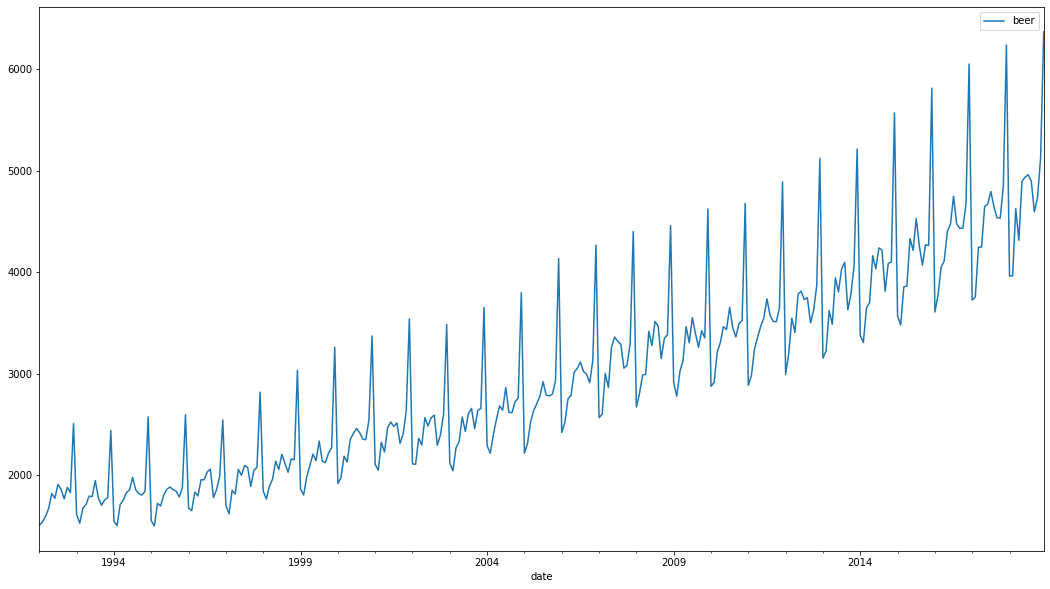

In [4]:
df.plot(x='date',y='beer',figsize=(18,10));

### Format the Data for PROPHET STANDARD

In [5]:
df.columns = ['ds','y']

In [6]:
df['ds'] = pd.to_datetime(df['ds'])

## Create and Fit Model

In [7]:
# This is fitting on all the data (no train test split in this example)
model = Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Forecasting

### Step 1: Create "future" placeholder dataframe

**NOTE: Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data. Info: https://facebook.github.io/prophet/docs/non-daily_data.html**

In [9]:
future = model.make_future_dataframe(periods=24,freq = 'MS')

In [10]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [11]:
future.tail(24)

,ds
324,2019-01-01
325,2019-02-01
326,2019-03-01
327,2019-04-01
328,2019-05-01
329,2019-06-01
330,2019-07-01
331,2019-08-01
332,2019-09-01
333,2019-10-01


In [12]:
len(df)

324

In [13]:
len(future) # 324 past +24 forecast future

348


### Step 2: Predict and fill in the Future

In [18]:
forecast = model.predict(future)

In [19]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1774.512619,1172.695248,1481.525131,1774.512619,1774.512619,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,0.0,0.0,0.0,1312.757569
1,1992-02-01,1777.322689,1190.280951,1543.381663,1777.322689,1777.322689,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,0.0,0.0,0.0,1350.176031
2,1992-03-01,1779.951464,1435.583856,1756.074139,1779.951464,1779.951464,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,0.0,0.0,0.0,1601.039150
3,1992-04-01,1782.761533,1430.934327,1747.670377,1782.761533,1782.761533,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,0.0,0.0,0.0,1586.704747
4,1992-05-01,1785.480956,1671.168617,1997.492866,1785.480956,1785.480956,45.197326,45.197326,45.197326,45.197326,45.197326,45.197326,0.0,0.0,0.0,1830.678281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2020-08-01,5200.687845,5080.876666,5407.216226,5186.226497,5212.520403,39.924918,39.924918,39.924918,39.924918,39.924918,39.924918,0.0,0.0,0.0,5240.612763
344,2020-09-01,5216.751615,4922.525200,5242.391257,5201.338584,5229.727896,-133.372206,-133.372206,-133.372206,-133.372206,-133.372206,-133.372206,0.0,0.0,0.0,5083.379410
345,2020-10-01,5232.297199,5041.540147,5352.790653,5215.846289,5245.995446,-43.375085,-43.375085,-43.375085,-43.375085,-43.375085,-43.375085,0.0,0.0,0.0,5188.922115
346,2020-11-01,5248.360970,5184.897940,5502.896879,5230.266813,5262.972606,87.856779,87.856779,87.856779,87.856779,87.856779,87.856779,0.0,0.0,0.0,5336.217749


In [20]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [22]:
#make a selection of subset
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(25)

,ds,yhat,yhat_lower,yhat_upper
323,2018-12-01,5989.288284,5828.899782,6150.258212
324,2019-01-01,4444.430853,4295.106418,4604.658001
325,2019-02-01,4469.157344,4301.403282,4624.616074
326,2019-03-01,4709.682968,4547.184385,4871.979141
327,2019-04-01,4732.643856,4573.592262,4888.240432
328,2019-05-01,5003.972986,4854.272486,5166.982401
329,2019-06-01,4993.722408,4838.800716,5141.186472
330,2019-07-01,5139.893745,4978.968891,5298.377926
331,2019-08-01,5047.898770,4886.057511,5208.650473
332,2019-09-01,4907.836992,4741.794293,5078.729135


### Plotting Forecast

We can use Prophet's own built in plotting tools

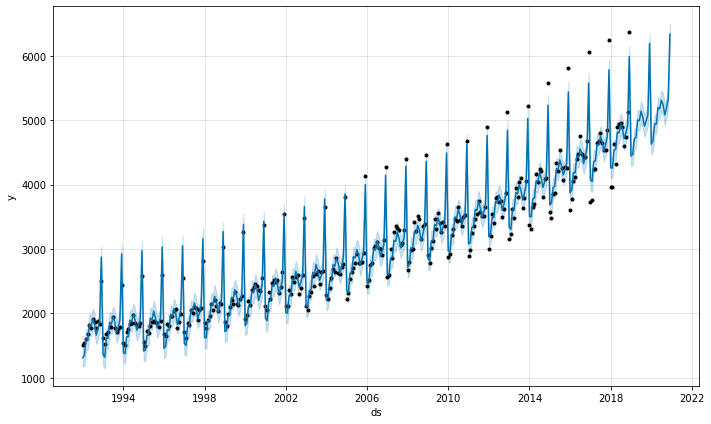

In [23]:
model.plot(forecast);

(528.0, 600.0)

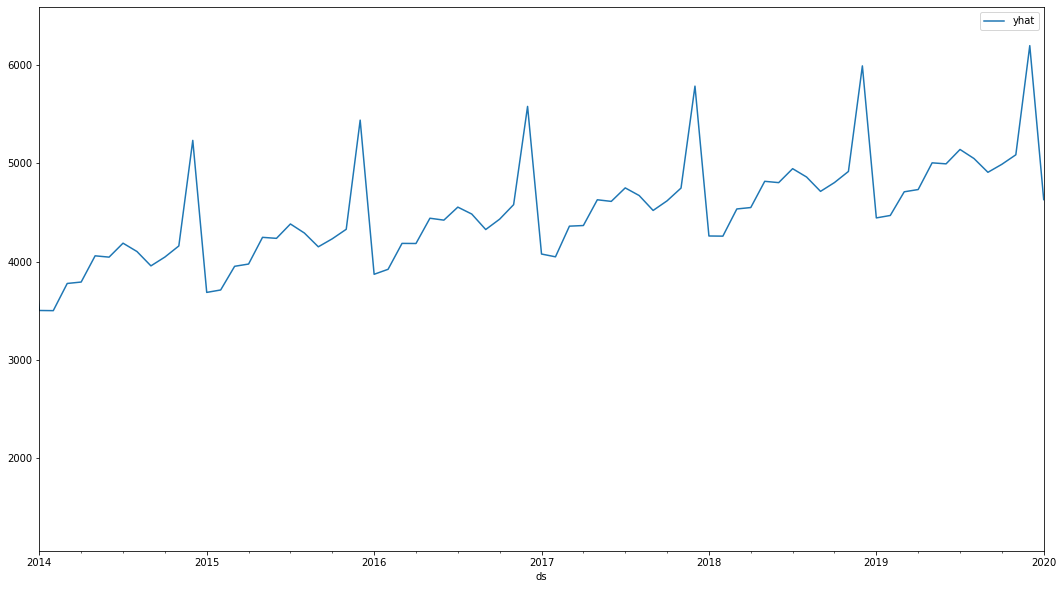

In [24]:
import matplotlib.pyplot as plt

forecast.plot(x='ds',y='yhat',figsize=(18,10))
plt.xlim('2014-01-01','2020-01-01')

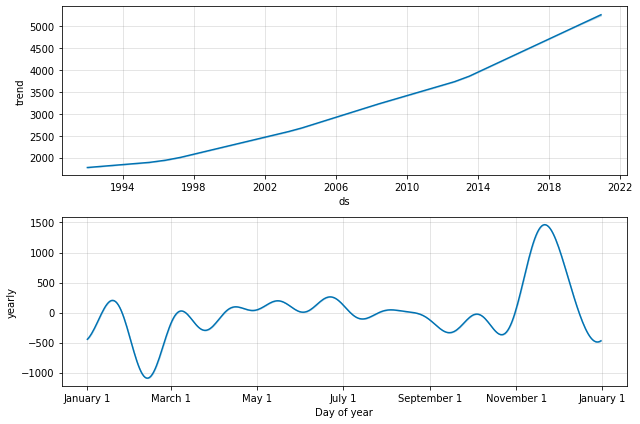

In [25]:
model.plot_components(forecast);